In [1]:
import pandas as pd
import geopandas as gpd
from pathlib import Path
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams.update({'font.size': 14})
from matplotlib.offsetbox import AnchoredText

In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
## laad gpkg will considered tracks
gdf = gpd.read_file(r"..\gis\gpkg\STORM_NA_R2_IN.gpkg")
gdf.head()

,cat_max,min_pres,max_ws,rmax_ws,lf,d2NC,traj,stormid,geometry
0,3.0,953.7,50.8,74.080002,1.0,571.303714,306.734075,4,"LINESTRING (-67.90000 22.10000, -68.40000 22.4..."
1,4.0,939.2,52.7,74.080002,0.0,822.784684,347.184714,5,"LINESTRING (-49.40000 13.40000, -50.20000 13.8..."
2,0.0,993.2,22.0,35.496668,0.0,1035.895766,19.242162,8,"LINESTRING (-83.80000 24.60000, -83.70000 24.9..."
3,0.0,993.2,22.0,40.281001,1.0,992.030799,22.104144,9,"LINESTRING (-83.80000 24.60000, -83.70000 24.9..."
4,0.0,1000.4,18.5,56.717500,0.0,666.410514,276.144983,11,"LINESTRING (-76.60000 29.10000, -76.70000 29.1..."


In [29]:
len(gdf)

32247

In [4]:
## load time series of the tracks
dfall = pd.read_pickle(r"..\data\STORM\processed\STORM_NA_R2_InOut.pkl")
dfall.head()

,year,month,yr_tc_number,time_step,basin_id,lat,lon,min_press,max_ws,rad_to_max_ws,cat,landfall,dist_to_land,tc_number,dist_to_NC,trajectory,mean_trajectory,In
0,0.0,10.0,0.0,0.0,1.0,8.9,-45.2,993.946699,20.371998,46.299999,0.0,0.0,851.946656,0,4336.133140,281.309932,276.490692,0
1,0.0,10.0,0.0,1.0,1.0,9.0,-45.7,992.800000,21.200000,45.905957,0.0,0.0,815.967429,0,4290.629311,278.130102,276.490692,0
2,0.0,10.0,0.0,2.0,1.0,9.1,-46.4,992.100000,21.700000,45.511914,0.0,0.0,766.103506,0,4230.498007,276.340192,276.490692,0
3,0.0,10.0,0.0,3.0,1.0,9.2,-47.3,993.000000,21.100000,45.117872,0.0,0.0,705.759651,0,4156.153101,275.710593,276.490692,0
4,0.0,10.0,0.0,4.0,1.0,9.3,-48.3,993.100000,20.900000,44.723829,0.0,0.0,647.548285,0,4075.371766,281.309932,276.490692,0


In [5]:
## load reduced dataset (input of MDA)
dfpnt = pd.read_pickle(r'..\data\STORM\processed\STORM_NA_R2_In_pnt.pkl')
dfpnt.head()

,year,month,yr_tc_number,time_step_at_min_press,time_step_at_min_distNC,lat_at_min_press,lon_at_min_press,lat_at_min_distNC,lon_at_min_distNC,min_press_at_min_distNC,...,distNC_at_min_distNC,distNC_at_min_press,trajectory_at_min_distNC,trajectory_at_min_press,mean_trajectory,curvature,duration,lat_gen,lon_gen,length
0,0.0,11.0,4.0,25.0,33.0,29.6,-76.2,30.5,-79.3,977.2,...,571.303714,623.563360,284.036243,303.690068,306.734075,1.149159e-13,46.0,22.1,-67.9,1895.686058
1,0.0,9.0,5.0,20.0,49.0,17.2,-61.5,33.2,-68.2,954.5,...,822.784684,2505.942098,21.801409,284.036243,347.184714,5.722621e-14,74.0,13.4,-49.4,6182.285591
2,0.0,8.0,8.0,4.0,8.0,25.9,-83.4,27.4,-82.8,1000.5,...,1035.895766,1209.183408,36.869898,18.434949,19.242162,0.000000e+00,8.0,24.6,-83.8,331.580145
3,0.0,8.0,8.0,4.0,9.0,25.9,-83.4,27.7,-82.5,1000.5,...,992.030799,1209.183408,45.000000,18.434949,22.104144,0.000000e+00,9.0,24.6,-83.8,376.112025
4,0.0,10.0,10.0,2.0,3.0,29.1,-76.9,29.2,-77.2,1003.8,...,666.410514,676.494047,288.434949,288.434949,276.144983,0.000000e+00,3.0,29.1,-76.6,60.426392


In [6]:
## load clusters
dfcl = pd.read_pickle(r"..\data\STORM\processed\MDA_output\STORM_NA_R2_In_pnt_Clusters_MDAvec_0500_allvars.pkl")
dfcl.head()

,time_step_at_min_press,time_step_at_min_distNC,lat_at_min_press,lon_at_min_press,lat_at_min_distNC,lon_at_min_distNC,min_press_at_min_distNC,min_press_at_min_press,max_ws_at_min_distNC,max_ws_at_min_press,...,trajectory_at_min_distNC,trajectory_at_min_press,mean_trajectory,curvature,duration,lat_gen,lon_gen,length,index_cluster,weight
0,15.0,0.0,21.9,-78.1,28.3,-73.3,992.635248,951.3,22.635555,46.2,...,239.036243,213.690068,228.828663,2.876623e-14,41.0,28.3,-73.3,2554.119573,8782,0.006946
1,120.0,143.0,16.3,-65.1,22.1,-61.9,949.800000,910.6,50.300000,69.3,...,53.130102,45.000000,355.203280,5.694376e-14,283.0,14.1,-33.6,13074.133971,12747,0.000031
2,3.0,0.0,47.6,-59.6,43.6,-62.8,998.778378,996.3,18.108442,18.6,...,38.157227,39.289407,38.513534,0.000000e+00,4.0,43.6,-62.8,651.363018,1913,0.001085
3,37.0,36.0,34.8,-75.3,34.1,-76.4,913.900000,913.1,68.800000,69.3,...,57.528808,57.528808,31.922038,3.584866e-15,55.0,18.0,-86.8,5133.555071,28815,0.000899
4,11.0,83.0,10.1,-31.9,34.3,-75.9,995.400000,968.9,20.200000,33.7,...,53.130102,293.198591,308.124180,5.716548e-14,88.0,8.1,-26.4,6440.026226,3112,0.000093


In [7]:
## going backwards for the first 10 clusters
subIndex = dfcl.loc[dfcl.index[:10], 'index_cluster']
tc_number = dfpnt.loc[subIndex, 'tc_id'].values.astype(int)

In [8]:
## get index of the first 10 storms in the gdf
subIndex = [list(gdf['stormid']).index(x) for x in tc_number]
gdfSub = gdf.iloc[subIndex, :]

In [10]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

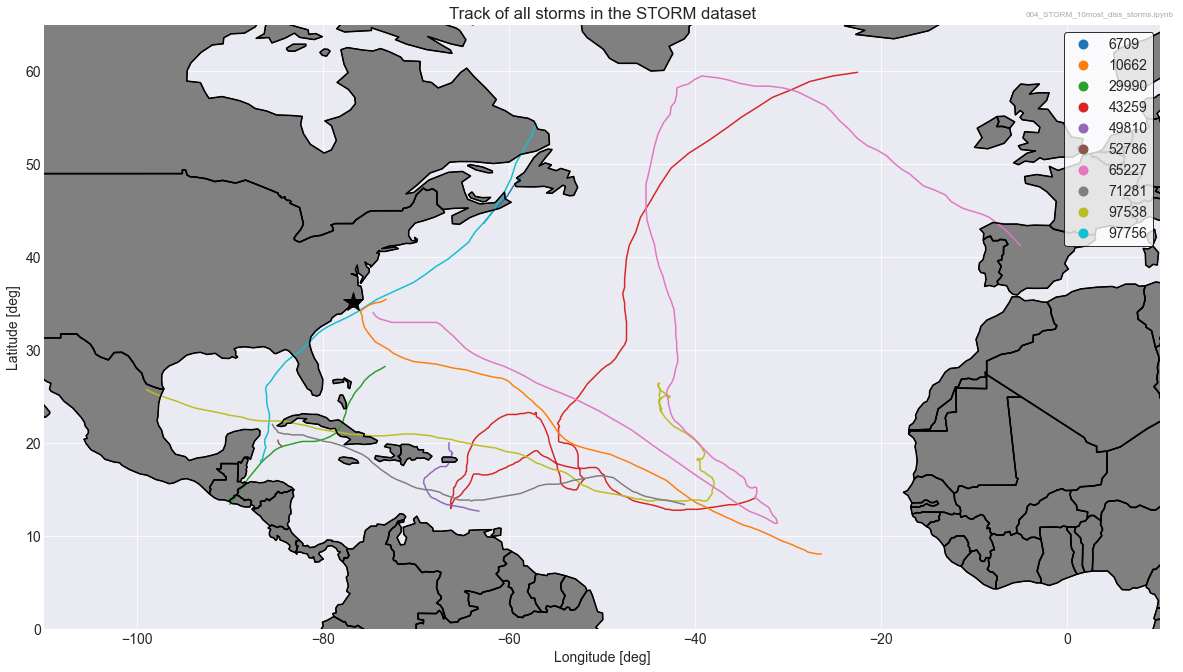

In [34]:
fig, ax = plt.subplots(figsize = (20, 20))
gdfSub.plot(ax = ax, legend = True, categorical = True, column = 'stormid', legend_kwds = {'frameon':True})
world.plot(ax = ax, color = 'grey', edgecolor = 'k')
world.boundary.plot(ax = ax, color = 'k')

ax.plot([-76.8], [35.2], color = 'k', marker = '*', ms = 20)
ax.set_xlim([-110, 10])
ax.set_ylim([0, 65])
ax.set_aspect('equal')
ax.set_xlabel('Longitude [deg]')
ax.set_ylabel('Latitude [deg]')
ax.set_title('Track of all storms in the STORM dataset')

leg = ax.get_legend()
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_facecolor('w')
# leg.set_frameon(True)
# leg.set_bbox_to_anchor((1.1, 0.6))

text = AnchoredText(nb_name, 'upper right',frameon = False, borderpad = -2, prop=dict(fontsize = 'xx-small', alpha = 0.4))
ax.add_artist(text)

In [36]:
gdfSub.to_csv(r'..\data\STORM\processed\MDA_output\10mostDiss_storms_tracksumm.csv')

In [38]:
dfcl.loc[dfcl.index[:10], :].to_csv(r'..\data\STORM\processed\MDA_output\10mostDiss_storms_MDAoutout.csv')

In [41]:
gdfSub

,cat_max,min_pres,max_ws,rmax_ws,lf,d2NC,traj,stormid,geometry
8782,3.0,951.3,46.2,55.119047,1.0,833.692984,228.828663,29990,"LINESTRING (-73.30000 28.30000, -73.80000 28.0..."
12747,5.0,910.6,69.3,50.440915,0.0,2051.749677,355.203280,43259,"LINESTRING (-33.60000 14.10000, -34.30000 13.8..."
1913,0.0,996.3,19.4,59.264001,0.0,1520.900642,38.513534,6709,"LINESTRING (-62.80000 43.60000, -61.70000 45.0..."
28815,5.0,913.1,69.3,61.182144,1.0,127.417933,31.922038,97756,"LINESTRING (-86.80000 18.00000, -86.70000 18.1..."
3112,1.0,968.9,33.9,42.034157,0.0,129.457613,308.124180,10662,"LINESTRING (-26.40000 8.10000, -26.90000 8.100..."
14736,2.0,966.3,39.5,29.497310,1.0,1959.972830,355.370468,49810,"LINESTRING (-63.20000 12.70000, -63.80000 12.8..."
28759,5.0,894.0,73.8,35.758617,1.0,1552.472161,340.170113,97538,"LINESTRING (-43.70000 23.30000, -43.70000 23.3..."
19296,4.0,933.6,57.4,53.579005,1.0,227.924881,44.404220,65227,"LINESTRING (-74.70000 34.10000, -74.60000 34.0..."
15621,0.0,992.1,20.5,101.860001,0.0,1822.197962,325.321252,52786,"LINESTRING (-84.40000 19.60000, -84.60000 19.8..."
21164,5.0,901.3,73.8,160.568404,0.0,1670.513901,282.419931,71281,"LINESTRING (-41.10000 13.40000, -41.50000 13.5..."


In [43]:
dct = {}
for tc in gdfSub['stormid']:
    dct[tc] = dfall[dfall['tc_number'] == tc]

In [46]:
writer = pd.ExcelWriter(r'..\data\STORM\processed\MDA_output\10mostDiss_storms_tracks.xlsx', engine='openpyxl')
for df_name, df in dct.items():
    df.to_excel(writer, sheet_name = str(df_name))
writer.save()